In [1]:
import math
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
plt.ion()
# %matplotlib widget

#from sympy.solvers import solve
#from sympy import Symbol
#x = Symbol('x')
#solve(math.acos(math.sqrt(0.493**2 + x**2) / (1.03 * x) - 0.9, x))

In [18]:
masses = [511e-6, 0.140, 0.493, 0.935]
bfield = 2.

def changle(m, p, n = 1.03):
    beta = p / sqrt(m^2 + p^2)
    return acos(1. / (n * beta))

# approximation
def sep_max(m1, m2, n = 1.03, nsigma = 3., res = 1.5e-3):
    return math.sqrt((m2**2 - m1**2)/(2. * nsigma * res * math.sqrt(n**2 - 1)))

def tof_sep_max(m1, m2, L = .85, nsigma = 3., res = 1.5e-3): # 20 ps = 6.e-3
    return math.sqrt((m2**2 - m1**2) * L / (2. * nsigma * res))

def sep_min(m1, m2, n = 1.03):
    return max(m1, m2) / math.sqrt(n**2 - 1)

# beta = p / E = p / sqrt(p**2 + m**2)

def min_pt(b, r):
    return 0.3 * b * r/2.

def pt(p, eta):
    return p / math.cosh(eta)

In [19]:
def draw_rich(ax, etas, n = 1.03, nsigma = 3., color = 'blue'):
    for i in range(0, len(ax)):
        lbound = [min_pt(bfield, 0.9 if eta <= 1.75 else 0.05) for eta in etas]
        thr = [pt(sep_min(masses[i], masses[i+1], n), eta) for eta in etas]
        lbound = np.maximum(thr, lbound)
        ubound = [pt(sep_max(masses[i], masses[i+1], n, nsigma), eta) for eta in etas]
        ax[i].fill_between(etas, lbound, np.maximum(lbound, ubound), 
                           alpha=1.0, ec=color, hatch='..', color=color, fc='none', label=f'RICH n={n}')

In [20]:
def draw_itof(ax, etas, nsigma = 3., color = 'orange'):
    for i in range(0, len(ax)):
        lbound = [min_pt(bfield, 0.44 if eta <= 1.75 else 1000.) for eta in etas]
        ubound = [pt(tof_sep_max(masses[i], masses[i+1], L=.19 * math.cosh(eta), nsigma = nsigma), eta) for eta in etas]
        ax[i].fill_between(etas, lbound, np.maximum(lbound, ubound), 
                           alpha=1., ec=color, hatch='\\\\', color=color, fc='none', label=f'TOF @ 44 cm (5ps)')

def draw_otof(ax, etas, nsigma = 3., color = 'yellow'):
    for i in range(0, len(ax)):
        lbound = [min_pt(bfield, 0.85 if eta <= 1.75 else 0.05) for eta in etas]
        ubound = [pt(tof_sep_max(masses[i], masses[i+1], L=.85 * math.cosh(eta) if eta <= 1.75 else 4.05, nsigma = nsigma), eta) for eta in etas]
        ax[i].fill_between(etas, lbound, np.maximum(lbound, ubound), 
                           alpha=1., ec=color, hatch='//', color=color, fc='none', label=f'oTOF')

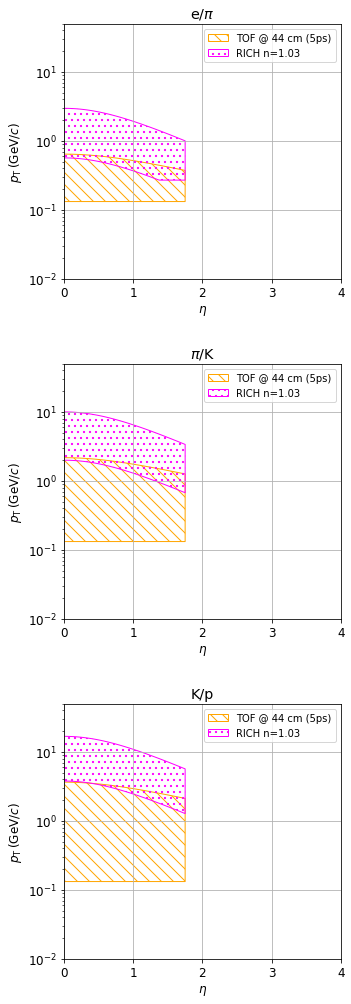

In [22]:
nplots = 3
fig, ax = plt.subplots(nplots, 1, figsize=(6, 5 * nplots))
plt.rcParams.update({'font.size':12})
fig.tight_layout(pad=5.0)

etas = np.linspace(0., 4., 100)
betas = np.linspace(0., 1.75, 100)
fetas = np.linspace(1.75, 4., 100)

draw_itof(ax, betas, 3., 'orange')
# draw_otof(ax, etas, 3., 'green')

#draw_rich(ax, etas, n = 1.0005, color='magenta')
#draw_rich(ax, etas, n = 1.0014, color='red')
#draw_rich(ax, etas, n = 1.003, nsigma = 3., color='cyan')

# draw_rich(ax, fetas, n = 1.006, nsigma = 3., color='blue')
draw_rich(ax, betas, n = 1.03, nsigma = 3., color='magenta')

for a in ax:
    a.grid()
    a.set_yscale('log')
    a.set_xlabel(r"$\eta$")
    a.set_ylabel(r"$p_\mathrm{T}\,(\mathrm{GeV}/c)$")
    a.set_ylim(0.01, 50.)
    a.set_xlim(0., 4.)
    a.legend(fontsize=10)
ax[0].set_title(r"e/$\pi$")
ax[1].set_title(r"$\pi$/K")
ax[2].set_title(r"K/p")

plt.savefig('pid.pdf', transparent=True)

In [6]:
labels = ['e/pi', 'pi/K', 'K/p', 'pi/p']

for e in [0., 1.44, 1.7, 1.8, 3., 4.]:
    print(f'eta = {e}')
    for i in range(0, 3):
        print(labels[i], pt(tof_sep_max(masses[i], masses[i+1], .85 * math.cosh(e) if e <= 1.75 else 4.05, 4., 6.e-3), e))
    print(labels[3], pt(tof_sep_max(masses[1], masses[3], .85 * math.cosh(e) if e <= 1.75 else 4.05, 4., 6.e-3), e))

eta = 0.0
e/pi 0.5891338636639597
pi/K 1.9891981738881623
K/p 3.343213274680514
pi/p 3.8902422000435917
eta = 1.44
e/pi 0.3946183613875856
pi/K 1.3324206471055466
K/p 2.2393778826745043
pi/p 2.6057931771813565
eta = 1.7
e/pi 0.3503080063616776
pi/K 1.1828076597384714
K/p 1.987925748846869
pi/p 2.313197514883756
eta = 1.8
e/pi 0.4138325500232665
pi/K 1.3972969533309862
K/p 2.3484144437533714
pi/p 2.732670703801962
eta = 3.0
e/pi 0.12773308730702254
pi/K 0.4312880988303817
K/p 0.7248589487708427
pi/p 0.843463051832086
eta = 4.0
e/pi 0.047091056986602944
pi/K 0.1590019694023989
K/p 0.26723204444100374
pi/p 0.31095754026869965


In [7]:
labels = ['e/pi', 'pi/K', 'K/p', 'pi/p']

n = 1.006

for e in [0., 1.44, 1.7, 1.8, 3., 4.]:
    print(f'eta = {e}')
    for i in range(0, 3):
        print(labels[i], 
              pt(sep_min(masses[i], masses[i+1], n), e),
              pt(sep_max(masses[i], masses[i+1], n, 3., 1.5e-3), e))
    print(labels[3], pt(sep_max(masses[1], masses[3], n, 3.), e))

eta = 0.0
e/pi 1.2761065744542055 4.455365557933882
pi/K 4.49371815147088 15.043448659915255
K/p 8.522568907962015 25.283281433190723
pi/p 29.420225485428094
eta = 1.44
e/pi 0.5725501728844019 1.9989868961761992
pi/K 2.0161945373715007 6.749537462963048
K/p 3.8238172260493983 11.343838708651543
pi/p 13.199959568568486
eta = 1.7
e/pi 0.451189619211087 1.575271791378518
pi/K 1.588832016221899 5.318872270046655
K/p 3.013302099731188 8.939342803031254
pi/p 10.40203114661641
eta = 1.8
e/pi 0.4106573096687345 1.4337583319750589
pi/K 1.4461003833334718 4.841055032933083
K/p 2.742604175287619 8.136283082306276
pi/p 9.467571823192579
eta = 3.0
e/pi 0.12675302120684886 0.44254222676549915
pi/K 0.4463517103926891 1.4942345766300322
K/p 0.8465291059171691 2.5113359431210713
pi/p 2.922250021679961
eta = 4.0
e/pi 0.046729738321667026 0.16315100228886859
pi/K 0.16455543566129885 0.5508759482991751
K/p 0.31208789521970476 0.925848317795391
pi/p 1.0773390450452776
